# Exercice 4 : Rein artificiel

Un rein artificiel est un procédé biomédial qui permet d'épurer le sang de personnes ayant une insuffisance rénale : on parle de dialyse rénale. Le principe est de mettre en contact le sang du patient (avec une circulation extracorporelle) contenant les molécules à éliminer (urée, toxines, ...) avec une solution (le dialysat) ne contenant pas ces molécules à travers une membrane . Les molécules à éliminer diffusent alors des zones concentrées (le sang) vers le dialysat et sont donc éliminées du sang. Le procédé comporte deux entrées et deux sorties et peut se représenter avec le schéma suivant :

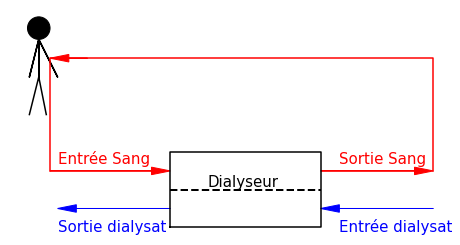

In [44]:
import matplotlib.pyplot as plt
xs, ys = 40, 40       #position du melangeur
lx, ly = 40, 20       #taille du melangeur
la, hla, hwa=25, 5,2  #taille des fleches

#tracé du flowsheet
def plot_flowsheet_dialyseur():
    fig, ax = plt.subplots(figsize=(8, 8)) 
    ax.set_aspect( 1 )
    plt.axis('off')
    plt.plot([2.5,5,5,2.5,5,10,5,5,7],[70,80,90,80,90,80,90,80,70],'k') #bonhomme
    tete=plt.Circle((5,93),3, color='k')
    ax.add_patch(tete)
    plt.plot([xs+lx+la+hla,xs+lx+la+hla,xs-la-hla-2,xs-la-hla-2],[ys+3*ly/4,85,85,ys+3*ly/4],'r') #circuit extracorporel
    plt.arrow(xs-la+hla-2,85,-hla,0, head_width=hwa, head_length=hla, fc='r', ec='r')
    plt.plot([xs,xs+lx,xs+lx,xs,xs],[ys,ys,ys+ly,ys+ly,ys],'k') #dialyseur
    plt.plot([xs,xs+lx],[ys+ly/2,ys+ly/2],'k--',linewidth=2)
    plt.arrow(xs,ys+ly/4,-la,0, head_width=hwa, head_length=hla, fc='b', ec='b')
    plt.arrow(xs-la-hla-2,ys+3*ly/4,la+2,0, head_width=hwa, head_length=hla, fc='r', ec='r')
    plt.arrow(xs+lx+la+hla,ys+ly/4,-la,0, head_width=hwa, head_length=hla, fc='b', ec='b')
    plt.arrow(xs+lx,ys+3*ly/4,la,0, head_width=hwa, head_length=hla, fc='r', ec='r')
    plt.text(50,51,'Dialyseur',c='k', size=15)
    plt.text(xs-la-hla,ys+3*ly/4+2, 'Entrée Sang', size=15, color='r')
    plt.text(xs+lx+5,ys+3*ly/4+2, 'Sortie Sang', size=15, color='r')
    plt.text(xs-la-hla,ys+ly/4-6, 'Sortie dialysat', size=15, color='b')
    plt.text(xs+lx+5,ys+ly/4-6, 'Entrée dialysat', size=15, color='b')
      
plot_flowsheet_dialyseur()
plt.show()

Lors du fonctionnement du rein artificiel, on mesure les débits et les concentrations en urée suivante :

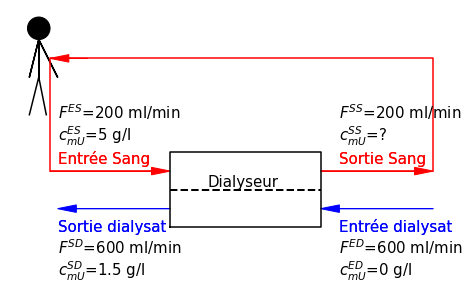

In [45]:
F_ES=200 #ml/min
F_SS=200 #ml/min
F_ED=600 #ml/min
F_SD=600 #ml/min
c_ES=5   #g/L
c_ED=0   #g/L
c_SD=1.5   #g/L

plot_flowsheet_dialyseur()
plt.text(xs-la-hla,ys+3*ly/4+2, 'Entrée Sang', size=15, color='r')
plt.text(xs-la-hla,ys+3*ly/4+14, r"$F^{ES}$"+'={} ml/min'.format(F_ES), size=15)
plt.text(xs-la-hla,ys+3*ly/4+8, r"$c^{ES}_{mU}$"+'={} g/l'.format(c_ES), size=15)
plt.text(xs+lx+5,ys+3*ly/4+2, 'Sortie Sang', size=15, color='r')
plt.text(xs+lx+5,ys+3*ly/4+14, r"$F^{SS}$"+'={} ml/min'.format(F_SS), size=15)
plt.text(xs+lx+5,ys+3*ly/4+8, r"$c^{SS}_{mU}$"+'=?', size=15)    
plt.text(xs-la-hla,ys+ly/4-6, 'Sortie dialysat', size=15, color='b')
plt.text(xs-la-hla,ys+ly/4-12, r"$F^{SD}$"+'={} ml/min'.format(F_SD), size=15)
plt.text(xs-la-hla,ys+ly/4-18, r"$c^{SD}_{mU}$"+'={} g/l'.format(c_SD), size=15)
plt.text(xs+lx+5,ys+ly/4-6, 'Entrée dialysat', size=15, color='b')
plt.text(xs+lx+5,ys+ly/4-12, r"$F^{ED}$"+'={} ml/min'.format(F_ED), size=15)
plt.text(xs+lx+5,ys+ly/4-18, r"$c^{ED}_{mU}$"+'={} g/l'.format(c_ED), size=15)
plt.show()

1- Calculer la concentration en urée dans le sang qui sort du rein artificiel et qui retourne dans le corps du patient

> On applique un bilan sur les débits partiels en urée. Pour cela on écrit que la somme des débits entrants en urée est égale à la somme des débits sortants en urée :
> $$\sum{F^{E}~c^{E}_{U}}=\sum{F^{S}~c^{S}_{U}}$$
> $$F^{ES}~c^{ES}_{U}+F^{ED}~c^{ED}_{U}=F^{SS}~c^{SS}_{U}+F^{SD}~c^{SD}_{U}$$
>$$c^{SS}_{U}=\frac{F^{ES}~c^{ES}_{U}+F^{ED}~c^{ED}_{U}-F^{SD}~c^{SD}_{U}}{F^{SS}}$$


In [46]:
c_SS=(F_ES*c_ES+F_ED*c_ED-F_SD*c_SD)/F_SS

print('La concentration en urée en sortie du dialyseur est de {} g/l'.format(c_SS))

La concentration en urée en sortie du dialyseur est de 0.5 g/l


2- En déduire le débit d urée qui est éliminé du sang du patient (vous pourrez faire deux bilans différents pour trouver cette valeur)

> Le débit d'urée éliminé, j, peut être calculé en déterminant la quantité éliminée du sang $F^{ES}~c^{ES}_{U}-F^{SS}~c^{SS}_{U}$ ou la quantité récupérée dans le dialysat $F^{SD}~c^{SD}_{U}-F^{ED}~c^{ED}_{U}$ :
$$j_U=F^{ES}~c^{ES}_{U}-F^{SS}~c^{SS}_{U}=F^{SD}~c^{SD}_{U}-F^{ED}~c^{ED}_{U}$$

In [47]:
j1=(F_ES*c_ES-F_SS*c_SS)*0.001
j2=(F_SD*c_SD-F_ED*c_ED)*0.001

if round(j1,3) != round(j2,3):
    print ('PROBLEME de calcul')

print('Le débit d urée est {} g/min'.format(j1,j2))

Le débit d urée est 0.9 g/min


3- La clairance est définit comme le rapport de ce débit sur la concentration en urée dans le sang du patient en entrée de dialyseur. Calculer la clairance du rein artificiel. 

> La clairance est définie comme 
$$K=\frac{j_U}{c^{ES}_{U}}$$



In [48]:
K=j1/c_ES      #L/min
print('La clairance est de {} ml/min'.format(K*1000))

La clairance est de 180.0 ml/min


La clairance du rein artificiel peut être comparée au débit de filtration glomérulaire, DFG, du patient qui est définit comme le débit de sang épuré. Le DFG d'un patient sain est de l'ordre de 120 ml/min. 

4. Comparer la clairance du rein artificiel au DFG naturel du rein.

> La clairance du rein artificiel est supérieure à celui d'un rein normal. C'est normal puisque les séances de dialyse se déroulent sur une période de 4 ans et plusieurs jours par semaine. Le rein artificiel doit donc permettre une épuration du sang plus rapide que celle qui se produit naturellement 24h/24.



# Pour aller plus loin

### Estimation du temps de dialyse 

Un patient de 80 kg arrive avec une teneur en urée, $c_0$ de 3 g/L. La dialyse doit lui permettre de repartir avec une concentration en urée, $c_f$ de 0,8 g/L.

Par un bilan sur le sang du patient, il est possible de démontrer (en master !) que la concentration en urée dans le sang du patient, $c$, évolue au cours du temps $t$ selon :
$$\frac{c}{c_0}=e^{-\frac{K}{V}t}$$
où $K$ est la clairance du rein artificiel et $V$ est le volume d'eau corporelle.
En intégrant cette relation, on peut définir le temps de dialyse, $t_D$ permettant d'atteindre la concentration $c_f$ en urée :
$$t_D=V\frac{ln(c_0/c_f)}{K}$$

Calculer le temps de dialyse nécessaire.



Le temps de dialyse estimé est de 5.68 h


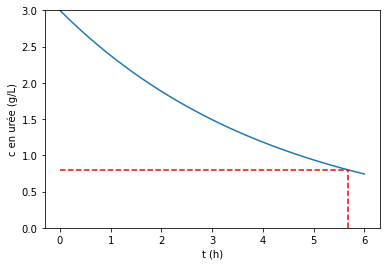

In [49]:
import numpy as np
import matplotlib.pyplot as plt

K1=K/(1000*60) #clairance en m3/s
C0=3
Cf=0.8 
P=80 #kg
# Volume d’eau corporelle à la fin de séance (env 58% poids du corps)
ECTF=0.58*P/1000 #m3
td=ECTF*np.log(C0/Cf)/K1
print ('Le temps de dialyse estimé est de {:.2f} h'.format(td/3600))
t=np.linspace(0,6,100)
plt.plot(t,C0*np.exp(-K1*t*3600/ECTF))
plt.plot([0,td/3600],[Cf,Cf],'r--')
plt.plot([td/3600,td/3600],[0,Cf],'r--')
plt.xlabel('t (h)')
plt.ylabel('c en urée (g/L)')
plt.ylim(0,C0)
plt.show()